# Tutorial de Morsa

Comencemos por importar `morsa`. También haremos uso de `numpy` y `matplotlib`:

In [1]:
import morsa
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

## Definición de los jugadores

Definamos para empezar cuatro jugadores que distinguiremos con colores: `jugador_rojo`, `jugador_verde`, `jugador_amarillo` y `jugador_azul`. Dos de ellos serán pingüinos, y los otros dos serán una ballena y una morsa. Asignaremos nombre y edad para cada uno de ellos:

In [2]:
jugador_rojo = morsa.jugadores.Morsa(nombre='Isabel', edad=44)
jugador_verde = morsa.jugadores.Ballena(nombre='Rocio', edad=30)
jugador_amarillo = morsa.jugadores.Pinguino(nombre='Cayetano', edad=35)
jugador_azul = morsa.jugadores.Pinguino(nombre='Felipe', edad=23)

Vamos a explorar en primer lugar quien es cada jugador y en qué juego son más habiles:

In [3]:
jugador_rojo.quien_soy()

Soy Isabel, tengo 44 años y soy una morsa


In [4]:
jugador_verde.quien_soy(solo_nombre=True)

Soy Rocio


In [5]:
jugador_amarillo.cual_es_mi_mejor_habilidad()

'tres en raya'

In [6]:
jugador_azul.cual_es_mi_mejor_habilidad()

'tres en raya'

Podemos por ejemplo también cual es el factor suerte de los jugadores:

In [7]:
jugador_rojo.suerte

0.6404025102207127

In [8]:
jugador_verde.suerte

0.4229390583630249

O cuantos puntos llevan:

In [9]:
jugador_azul.puntos

0

## Juegos

Veamos primero la lista de juegos disponible:

In [10]:
morsa.consulta_lista_de_juegos()

['parchís', 'ajedrez', 'dominó', 'tres en raya']

Y los puntos que se asignan al ganar, o se sustraen al perder, en cada juego:

In [11]:
morsa.consulta_puntos_por_juego('parchís')

{'gana': 1, 'pierde': -1}

Podríamos cambiar los puntos ganados o perdidos por juego:

In [12]:
morsa.asignar_puntos_por_juego('parchís', gana=100, pierde=-1000)

In [13]:
morsa.consulta_puntos_por_juego('parchís')

{'gana': 100, 'pierde': -1000}

Pero esa puntuación es exagerada, vamos a dejar mejor la puntuación de parchís como estaba:

In [14]:
morsa.asignar_puntos_por_juego('parchís', gana=1, pierde=-1)

Además, la librería dispone de un método que aleatoriamente arroja un juego cada vez que lo invocamos:

In [15]:
for _ in range(20):
    juego_aleatorio = morsa.generador_aleatorio_de_juegos()
    print(juego_aleatorio)

dominó
dominó
ajedrez
ajedrez
parchís
ajedrez
tres en raya
ajedrez
dominó
dominó
parchís
parchís
dominó
dominó
ajedrez
dominó
ajedrez
dominó
ajedrez
tres en raya


## Competición

Ya podemos comenzar a jugar, elijamos dos jugadores y un juego y enfrentémoslos:

In [16]:
morsa.jugar('ajedrez', jugador_verde, jugador_rojo, verbose=True)

Isabel no sabe jugar ajedrez


Repite la celda anterior cambiando de juego y jugadores. Es posible que encuentres alguna situación en la que uno de los jugadores no sabe jugar al juego elegido, en ese caso la partida no se lleva a cabo y la puntuación de ambos permanece igual.

In [17]:
morsa.jugar('ajedrez', jugador_amarillo, jugador_azul, verbose=True)

In [18]:
morsa.jugar('tres en raya', jugador_amarillo, jugador_rojo, verbose=True)

In [19]:
morsa.jugar('dominó', jugador_amarillo, jugador_verde, verbose=True)

In [20]:
morsa.jugar('parchís', jugador_azul, jugador_rojo, verbose=True)

Felipe no sabe jugar parchís


In [21]:
morsa.jugar('ajedrez', jugador_azul, jugador_verde, verbose=True)

Podemos saber quien lleva más puntuación haciendo uso del método `quien_tiene_mas_puntos`:

In [22]:
morsa.quien_tiene_mas_puntos(jugadores=[jugador_azul, jugador_verde, jugador_amarillo, jugador_rojo])

('Rocio', 3, 'ballena')

O como vimos antes, podemos acudir a los atributo de cada objeto:

In [23]:
for jugador in [jugador_azul, jugador_verde, jugador_amarillo, jugador_rojo]:
    print("{} lleva {} puntos".format(jugador.nombre, jugador.puntos))

Felipe lleva -2 puntos
Rocio lleva 3 puntos
Cayetano lleva 3 puntos
Isabel lleva -2 puntos


Por último, si quisieras reiniciar la competición con estos mismos jugadores, puedes reiniciar su puntuación:

In [24]:
for jugador in [jugador_azul, jugador_verde, jugador_amarillo, jugador_rojo]:
    jugador.reiniciar_puntos()
    print("{} lleva {} puntos".format(jugador.nombre, jugador.puntos))

Felipe lleva 0 puntos
Rocio lleva 0 puntos
Cayetano lleva 0 puntos
Isabel lleva 0 puntos


## Cada especie animal tiene un poder

Cada una de las especies animales tienen una capacidad diferente, llamada poder. Las morsas pueden volver a generar aleatoriamente su factor suerte mediante el método `reasigno_suerte()`, los pingüinos pueden volver a generar aleatoriamente sus factores de habilidad mediante `reasigno_habilidades()`, y las ballenas pueden volver a generar aleatoriamente sus factores de habilidad y suerte mediante `reasigno_suerte_y_habilidades()`. Veamos primero cómo funciona para las morsas:

In [25]:
jugador_rojo.quien_soy()

Soy Isabel, tengo 44 años y soy una morsa


In [26]:
jugador_rojo.suerte

0.6404025102207127

In [27]:
jugador_rojo.reasigno_suerte()

In [28]:
jugador_rojo.suerte

0.8695801897456286

Ahora veamos el poder de los pingüinos:

In [29]:
jugador_amarillo.quien_soy()

Soy Cayetano, tengo 35 años y soy un pingüino


In [30]:
jugador_amarillo.habilidad

{'ajedrez': 0.143415786053684,
 'dominó': 0.049899213545536725,
 'tres en raya': 0.8447684192858284}

In [31]:
jugador_amarillo.reasigno_habilidades()

In [32]:
jugador_amarillo.habilidad

{'ajedrez': 0.22953641991450757,
 'dominó': 0.8744179720270141,
 'tres en raya': 0.11929436547801142}

Y por último las ballenas:

In [33]:
jugador_verde.quien_soy()

Soy Rocio, tengo 30 años y soy una ballena


In [34]:
jugador_verde.suerte

0.4229390583630249

In [35]:
jugador_verde.habilidad

{'parchís': 0.3431233746815442,
 'dominó': 0.9098603396436457,
 'ajedrez': 0.9894561198851404}

In [36]:
jugador_verde.reasigno_suerte_y_habilidades()

In [37]:
jugador_verde.suerte

0.3086356235565868

In [38]:
jugador_verde.habilidad

{'parchís': 0.13410736405841495,
 'dominó': 0.9726114034954632,
 'ajedrez': 0.5957966442407989}

## ¿Qué animal prefieres?

### Simulemos un torneo con múltiples jugadores

¿Será que hay alguna especia animal que tiene más probabilidad de ganar un torneo de juegos aleatorios? Hagamos que 300 jugadores, 100 de cada especie, se enfrenten en una larga secuencia de juegos elegidos aleatoriamente y veamos el resultado. Primero generemos los jugadores:

In [39]:
jugador = []

for _ in range(100):
    jugador.append(morsa.jugadores.Ballena())
    jugador.append(morsa.jugadores.Pinguino())
    jugador.append(morsa.jugadores.Morsa())

Conozcamos a alguno de los jugadores:

In [40]:
jugador[25].quien_soy()

Soy Lucía Bernal Llopis, tengo 97 años y soy un pingüino


In [41]:
jugador[65].quien_soy()

Soy Joaquin Piña Losada, tengo 75 años y soy una morsa


In [42]:
jugador[90].quien_soy()

Soy Mireia Nuria Fiol Ruano, tengo 86 años y soy una ballena


Ahora si. ¡Que empiece el torneo!.

In [43]:
numero_de_rondas = 1000 # cantidad de partidas que se van a jugar
numero_de_jugadores = len(jugador)
historico_jugadores = np.zeros([numero_de_jugadores, numero_de_rondas], dtype=int) # numpy array para acumular la puntuación

for indice_de_ronda in tqdm(range(numero_de_rondas)):
    
    juego_aleatorio = morsa.generador_aleatorio_de_juegos()
    
    for ii in range(numero_de_jugadores):
        for jj in range (ii+1,numero_de_jugadores):
            jugador_A = jugador[ii]
            jugador_B = jugador[jj]
            morsa.jugar(juego_aleatorio, jugador_A, jugador_B)
    
    for ii in range(numero_de_jugadores):
        historico_jugadores[ii, indice_de_ronda] = jugador[ii].puntos


100%|██████████| 1000/1000 [03:02<00:00,  5.48it/s]


Antes de hacer cualquier análisis veamos quien ha ganado:

In [44]:
indice_jugador_ganador = np.argmax(historico_jugadores[:,-1])

In [45]:
jugador[indice_jugador_ganador].quien_soy()

Soy Cristian Gil Gil, tengo 35 años y soy una ballena


In [46]:
jugador[indice_jugador_ganador].puntos

126621

Construyamos ahora el gráfico de evolución de algunos de los jugadores a lo largo del torneo, incluido el ganador. Representaremos las ballenas en azul, las morsas en rojo y los pingüinos en gris:

In [47]:
indices_de_jugadores_a_observar = [3, 24, 45, 67, 82, 107, 122, 148, 161, 183, 205, 226, 241, 265, 289]

if indice_jugador_ganador not in indices_de_jugadores_a_observar:
    indices_de_jugadores_a_observar.append(indice_jugador_ganador)

In [48]:
diccionario_colores = {'ballena':'tab:blue', 'morsa':'tab:red', 'pingüino':'tab:gray'}

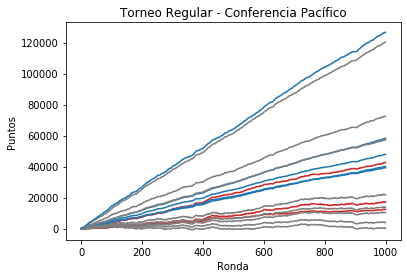

In [49]:
for ii in indices_de_jugadores_a_observar:
    color_especie = diccionario_colores[jugador[ii].especie]
    plt.plot(historico_jugadores[ii,:],'-', color=color_especie)

plt.title("Torneo Regular - Conferencia Pacífico")
plt.xlabel("Ronda")
plt.ylabel("Puntos")
plt.show()

Veamos el histograma de puntos alcanzados al final de la competición por especie:

In [50]:
puntuacion_final_ballenas=[]
puntuacion_final_pinguinos=[]
puntuacion_final_morsas=[]

for ii in range(numero_de_jugadores):
    if jugador[ii].especie == 'ballena':
        puntuacion_final_ballenas.append(historico_jugadores[ii,-1])
    elif jugador[ii].especie == 'pingüino':
        puntuacion_final_pinguinos.append(historico_jugadores[ii,-1])
    else:
        puntuacion_final_morsas.append(historico_jugadores[ii,-1])

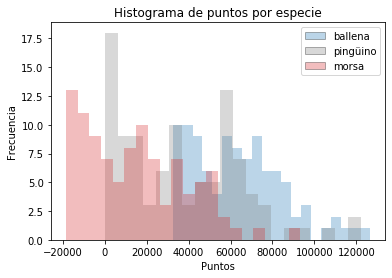

In [51]:
plt.hist(puntuacion_final_ballenas, histtype='stepfilled', color=diccionario_colores['ballena'], alpha=0.3, bins=20)
plt.hist(puntuacion_final_pinguinos, histtype='stepfilled', color=diccionario_colores['pingüino'], alpha=0.3, bins=20)
plt.hist(puntuacion_final_morsas, histtype='stepfilled', color=diccionario_colores['morsa'], alpha=0.3, bins=20)
plt.title("Histograma de puntos por especie")
plt.xlabel("Puntos")
plt.ylabel("Frecuencia")
labels= ["ballena","pingüino", "morsa"]
handles = [plt.Rectangle((0,0),1,1,color=diccionario_colores[ii],ec="k", alpha=0.3) for ii in labels]
plt.legend(handles, labels)
plt.show()

Parece que a las morsas les va peor que a las ballenas o a los pingüinos... ¿Será verdad?

### Ballena vs. Pingüino vs. Morsa

Entonces, si se enfrentan tres animales, uno de cada especie: ¿qué probabilidad de ganar tiene la morsa?
Hagamos muchos torneos suficientemente largos, sólo con tres jugadores, y veamos la tasa de éxito de cada especie.

In [52]:
numero_de_torneos = 2000 # cantidad de torneos que se van a jugar
numero_de_rondas = 400 # cantidad de rondas por torneo

contador_de_victorias = {'ballena':0, 'pingüino':0, 'morsa':0}

for _ in tqdm(range(numero_de_torneos)):
    
    jugador = []
    jugador.append(morsa.jugadores.Ballena())
    jugador.append(morsa.jugadores.Pinguino())
    jugador.append(morsa.jugadores.Morsa())

    for _ in range(numero_de_rondas):
    
        juego_aleatorio = morsa.generador_aleatorio_de_juegos()
        morsa.jugar(juego_aleatorio, jugador[0], jugador[1])
        morsa.jugar(juego_aleatorio, jugador[0], jugador[2])
        morsa.jugar(juego_aleatorio, jugador[1], jugador[2])
        
    nombre_ganador, puntos_ganador, especie_ganador = morsa.quien_tiene_mas_puntos(jugador)
    
    contador_de_victorias[especie_ganador] += 1



100%|██████████| 2000/2000 [01:41<00:00, 19.65it/s]


Veamos la tasa de éxito y fracaso de cada especie:

In [53]:
for especie in ['ballena', 'pingüino', 'morsa']:
    tasa_gana = round(100.0*((1.0*contador_de_victorias[especie])/numero_de_torneos), 2)
    tasa_pierde = round(100.0-tasa_gana, 2)
    print('La especie {} gana el {}% y pierde el {}% de las partidas'.format(especie, tasa_gana, tasa_pierde))

La especie ballena gana el 55.1% y pierde el 44.9% de las partidas
La especie pingüino gana el 30.85% y pierde el 69.15% de las partidas
La especie morsa gana el 14.05% y pierde el 85.95% de las partidas


### Ayuda a las morsas

¿Por qué las morsas pierden mas torneos que las ballenas o los pingüinos? ¿Qué tienes que hacer para que las morsas tengan mas opciones de victoria?